In [22]:
#Jon Stewart
#INSD 5170 Final Project Part V
%matplotlib notebook

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#decision tree
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




filename = "C:/Users/jws0258/Downloads/housing_boston.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filename, names=names)


The above code loads the relevant libraries, and imports the dataset. Once it has done that, it names the columns.

Now, a subset of those columns are used for this assignment, using only the RM, AGE, DIS, RAD, PTRATIO, and MEDV variables. 

In [3]:
df2 = df[['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'MEDV']]

Having finished that, the data must be checked for missing values. This is done below. The code finds all zero values, converts them to 'NAN', then counts the number of occurrences for each column.

In [4]:
df[['RM', 'PTRATIO', 'MEDV']] = df[['RM', 'PTRATIO', 'MEDV']].replace(0, np.NAN)
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


From the above output, it can be seen that there are no missing values for any of the columns shown. 

Next, the shape of the dataset, including the number of variables and the number of data examples, are shown using the below function.

In [6]:
print(df2.shape)

(452, 6)


It can be seen that there are six variables, and 452 total data samples in the above dataframe. 

Next, it would be nice to know the data types for each of the columns. 

In [8]:
print(df2.dtypes)

RM         float64
AGE        float64
DIS        float64
RAD          int64
PTRATIO    float64
MEDV       float64
dtype: object


All of the column variables except for RAD are float variables. RAD is an integer value.

Next, the first six rows of data are shown.

In [10]:
print(df2.head(6))

      RM   AGE     DIS  RAD  PTRATIO  MEDV
0  6.575  65.2  4.0900    1     15.3  24.0
1  6.421  78.9  4.9671    2     17.8  21.6
2  7.185  61.1  4.9671    2     17.8  34.7
3  6.998  45.8  6.0622    3     18.7  33.4
4  7.147  54.2  6.0622    3     18.7  36.2
5  6.430  58.7  6.0622    3     18.7  28.7


It would also be nice to have a statistical summary of each variable of the dataset. This is shown below.

In [12]:
print(df2.describe())

               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000   20.200000   26.600000
max      8.780000  100.000000   12.126500   24.000000   22.000000   50.000000


A histogram of each of the variables is shown below.
df2.hist(figsize=(7,7))
plt.show


<IPython.core.display.Javascript object>


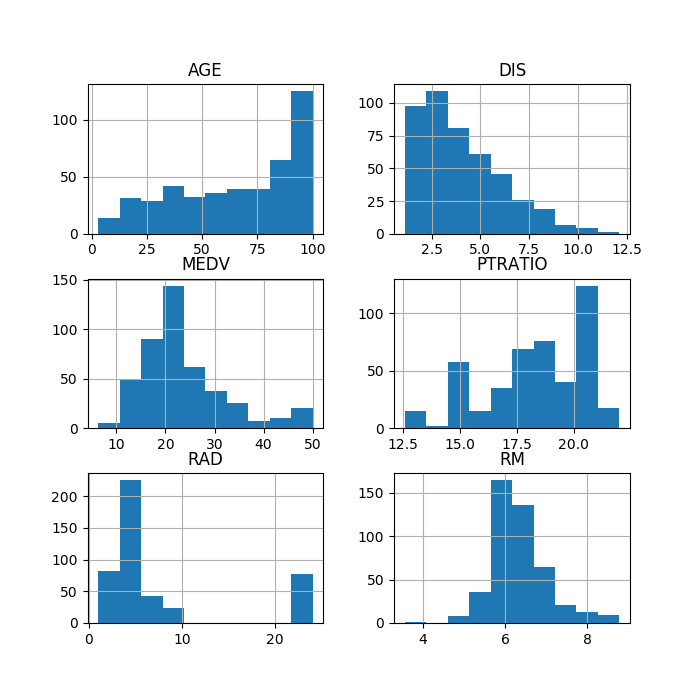

<function matplotlib.pyplot.show>

In [14]:
df2.hist(figsize=(7,7))
plt.show

Age, DIS, and RAD are heavily skewed. MEDV and RAD are fairly symmetric in terms of a distribution.

A density plot for each of the variables is shown below. 

<IPython.core.display.Javascript object>


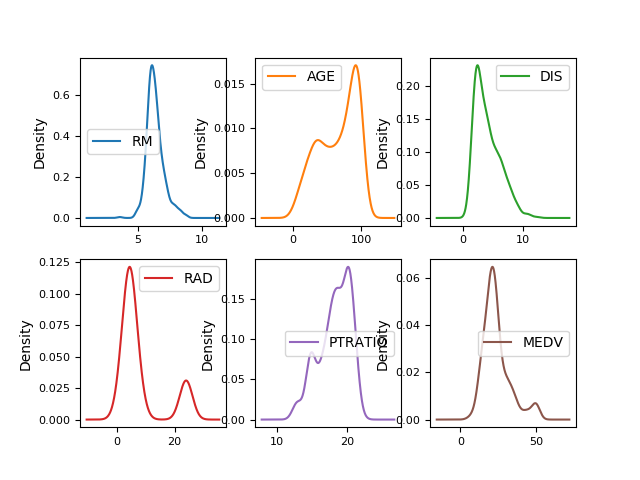

In [15]:
df2.plot(kind='density', subplots=True, layout=(2,3), sharex = False, legend = True, fontsize = 8)
plt.show()

A box plot of each of the variables is shown below.

<IPython.core.display.Javascript object>


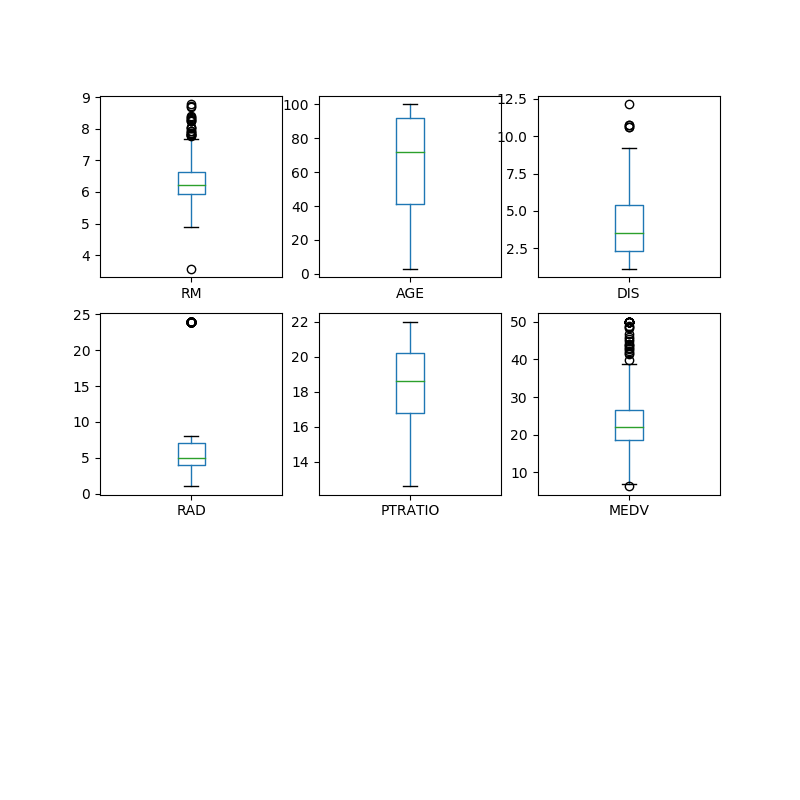

In [16]:
df2.plot(kind='box', subplots=True, layout=(3,3), sharex = False, sharey = False, figsize = (8,8))
plt.show()

Now, a scatter matrix is shown. This will show each variable plotted against the other in terms of values.

<IPython.core.display.Javascript object>


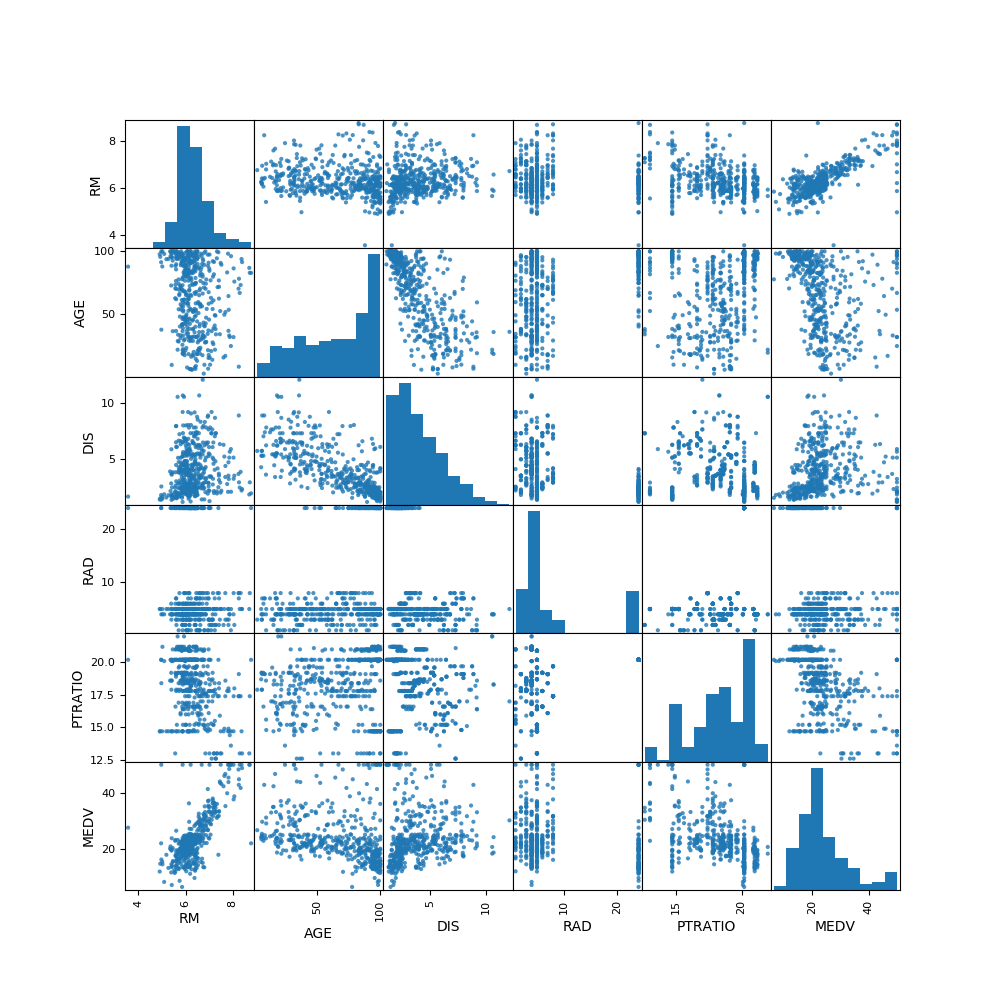

In [18]:
scatter_matrix(df2, alpha=0.8, figsize = (10,10))
plt.show()

Now that exploratory data analysis has been completed, setting up the data for the decision tree model will begin. First, the Dataset must be split into predictor and dependent variable arrays.

In [19]:
darray = df2.values

X = darray[:,0:5]
Y = darray[:,5]

Now, the data should be split into training and testing subsets, with 33% of the data being assigned to the testing set, and 77% of the data assigned to the training set.

In [21]:
test_size = .33
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = seed)

Now, the model will be instantiated and trained. 

In [39]:
tree_model = tree.DecisionTreeRegressor()  #instantiation
tree_mod = tree_model.fit(X_train,Y_train)
print(tree_mod)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


Next, the R^2 value for the regression tree will be shown. The R^2 value is the amount of variance explained by the model. This will be performed for both the test and train set.

In [37]:
#train set
print("Training dataset R squared: %.3f" % tree_mod.score(X_train, Y_train))

#test set
print("Testing dataset R squared: %.3f" % tree_mod.score(X_test, Y_test))


Training dataset R squared: 1.000
Testing dataset R squared: 0.784


From the above, the model was able to fit the training set perfectly, however, for testing, the explained variance was only .586.
This likeliy indicates that the model training may have overfit on this dataset.

Another way to test the performance of the model is with a k-fold cross validation. In this case, 10-fold cross validation is used to test the accuracy.

In [40]:
n_splits = 10
seed = 8
kfold = KFold(n_splits=n_splits, random_state = seed)
scoring = 'r2'
results = cross_val_score(tree_model, X, Y, cv=kfold, scoring=scoring)

print("Decision Tree Model R squared: %.3f (%.3f)" % (results.mean(), results.std()))


Decision Tree Model R squared: 0.220 (0.480)


The above result means that about 22% of the variance of each test fold is explained by the model. The rest is not. The amount to which explained variance varies among each test fold is .48.

Overall, it may be beneficial to reduce the max depth of the tree, or take other steps to reduce the likelihood of overfitting.

Next, it would be nice to see the results of predicting new data. To do so, data is created below.

In [44]:
Record1 = [4,45,5.7,2.5,15]
Record2 = [5,30,7,4,12]


Now, the new data is predicted with the trained model.

In [47]:
pred1 = tree_mod.predict(Record1)
pred2 = tree_mod.predict(Record2)

print(pred1)
print(pred2)

[ 21.7]
[ 20.3]


C:\Users\jws0258\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\jws0258\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


So, the tree model gives an estimate of 21.7 for prediction 1, and 20.3 for prediction 2.